In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#upload data structured
test_raw=pd.read_csv('Test_structured.csv')
train_raw=pd.read_csv('Train_structured.csv')

C:\Users\josee\miniconda3\envs\ambiente1\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#drop index, transform date to datetime
train_raw=train_raw.drop(columns='Unnamed: 0')
test_raw=test_raw.drop(columns='Unnamed: 0')


In [4]:
train_raw['DATE']=pd.to_datetime(train_raw['DATE'])
test_raw['DATE']=pd.to_datetime(test_raw['DATE'])

In [5]:
#columns frequency, current and pip are repeat it
train_raw['PRESS_INT'] = train_raw['PRESS_INT'].fillna(train_raw['PIP(PSI)'])
train_raw['CURRENT'] = train_raw['CURRENT'].fillna(train_raw['AMPERAGE'])
train_raw['FREQUENCY'] = train_raw['FREQUENCY'].fillna(train_raw['FREC(Hz)'])
test_raw['PRESS_INT'] = test_raw['PRESS_INT'].fillna(test_raw['PIP(PSI)'])
test_raw['CURRENT'] = test_raw['CURRENT'].fillna(test_raw['AMPERAGE'])
test_raw['FREQUENCY'] = test_raw['FREQUENCY'].fillna(test_raw['FREC(Hz)'])

del train_raw['PIP(PSI)']
del train_raw['AMPERAGE']
del train_raw['FREC(Hz)']
del test_raw['PIP(PSI)']
del test_raw['AMPERAGE']
del test_raw['FREC(Hz)']

In [6]:
# Look for wells with no outputs
pd.set_option('max_rows',105)
train_raw.groupby(by=['WELL_ID'])['WellFailure'].unique()

WELL_ID
DEEPWATER-000XAR                [nan, yes]
DEEPWATER-05YWY5                [nan, yes]
DEEPWATER-0KPXEZ         [nan, Manual off]
DEEPWATER-0SSSKO                [nan, yes]
DEEPWATER-1AD32W                [nan, yes]
DEEPWATER-1P54OE                [nan, yes]
DEEPWATER-1UBHZV    [nan, yes, Manual off]
DEEPWATER-1WOOJU                [nan, yes]
DEEPWATER-2MK4DS         [nan, Manual off]
DEEPWATER-34JETX                [nan, yes]
DEEPWATER-3FD330         [nan, Manual off]
DEEPWATER-3J5ZXG                [nan, yes]
DEEPWATER-3PEB5I                [nan, yes]
DEEPWATER-453GJ0         [nan, Manual off]
DEEPWATER-4TYG1P                [nan, yes]
DEEPWATER-51ZYBC         [nan, Manual off]
DEEPWATER-55KSI1         [nan, Manual off]
DEEPWATER-55X0XE                     [nan]
DEEPWATER-5DEUPB         [nan, Manual off]
DEEPWATER-5MZAFB         [nan, Manual off]
DEEPWATER-5RY0MV                [nan, yes]
DEEPWATER-A5W4QG                [nan, yes]
DEEPWATER-AHJLPP                [nan, yes]
DEE

In [7]:
to_remove = ['DEEPWATER-55X0XE', 'DEEPWATER-D4EH50', 'DEEPWATER-ZISKRZ']
idxs = []

for i in to_remove:
  idx = train_raw[train_raw['WELL_ID']==i].index
  idxs.append(idx)

train_raw = train_raw.drop(np.hstack(idxs))

In [8]:
#Description our dataset
train_raw.describe().round(2)


,CURRENT,PRESS_DESC,FREQUENCY,PRESS_INT,TEMP_INT,TEMP_MOT,OUT_VOLT,VIBRATION,BFPD,BOPD,BWPD,MSCF,BSW,GOR(MSFC/BPPD),GLR(SCF/BFPD),API,PROF_INTAKE,PSI_CAB
count,8143809.00,7607815.00,8143809.00,8143754.00,7883252.00,7859655.00,337950.00,7605542.00,8143809.00,8143809.00,8143809.00,8143809.00,8143809.00,8143809.00,8143809.00,8143809.00,8143809.00,8143809.00
mean,38.04,3600.30,58.22,1170.95,1182.59,276.90,339.64,250.84,781.83,352.03,429.80,40.99,42.59,1699.18,1231.34,21.42,9635.54,123.22
std,28.34,2095.24,26.10,7650.67,7775.45,143.91,183.92,4040.26,598.10,305.33,519.42,50.62,30.19,17035.33,14090.09,5.15,497.72,78.10
min,0.00,-3276.00,0.00,0.00,0.00,-17.78,0.00,0.00,13.90,7.30,-46.14,0.00,0.00,0.00,0.00,10.00,997.00,0.50
25%,23.00,3655.00,54.00,256.00,254.00,268.50,382.00,0.00,277.00,177.28,32.14,12.26,10.00,61.88,16.15,17.80,9452.00,60.00
50%,34.00,3946.00,56.00,358.00,353.00,284.00,433.20,0.00,649.00,261.12,168.55,28.35,41.00,84.01,45.34,18.90,9614.00,100.00
75%,57.00,4124.00,60.00,709.00,692.20,297.00,458.20,0.00,1188.00,441.00,704.48,48.90,70.00,162.83,82.35,25.70,9899.00,161.44
max,51970.00,94906.90,5051.00,189813.80,189813.80,6553.50,953.00,65535.00,3866.00,2425.84,3788.68,555.37,99.00,229020.00,226700.00,465.87,11850.00,8000.00


In [9]:
test_raw.describe().round(2)

,CURRENT,PRESS_DESC,FREQUENCY,PRESS_INT,TEMP_INT,TEMP_MOT,OUT_VOLT,VIBRATION,WellFailure,BFPD,BOPD,BWPD,MSCF,BSW,GOR(MSFC/BPPD),GLR(SCF/BFPD),API,PROF_INTAKE,PSI_CAB
count,1132106.00,977975.00,1132106.00,1132106.00,1049258.00,1066260.00,39431.00,1008350.00,0.0,1132106.00,1132106.00,1132106.00,1132106.00,1132106.00,1132106.00,1132106.00,1132106.00,1132106.00,1132106.00
mean,30.31,3015.04,57.57,768.38,195.98,210.09,339.88,42.84,NaN,621.54,207.32,414.28,19.21,44.82,355.73,206.59,23.76,9655.30,143.12
std,19.66,1710.23,34.47,1063.80,207.03,234.77,161.57,1656.97,NaN,684.63,188.19,557.82,21.06,28.59,6796.06,5514.83,6.37,532.21,115.27
min,0.00,-145.04,0.00,0.00,-17.78,-17.78,0.00,0.00,NaN,17.00,15.00,0.32,0.07,0.00,0.00,0.00,7.93,8514.00,0.00
25%,19.00,1464.90,53.00,200.00,219.40,32.00,368.80,0.00,NaN,123.00,73.80,27.12,1.85,22.94,28.74,4.32,18.00,9395.00,90.00
50%,24.00,3905.30,56.00,344.00,229.10,276.00,398.00,0.00,NaN,258.00,128.80,136.08,8.46,48.00,84.00,27.28,19.80,9486.00,120.00
75%,44.00,4178.00,61.90,1002.00,232.30,293.00,442.60,0.00,NaN,1104.00,296.00,694.64,34.76,76.00,124.01,54.30,31.20,10000.00,160.00
max,174.70,8653.40,3634.00,94908.00,11826.00,6553.00,960.60,65535.00,NaN,2436.07,810.00,2084.91,173.99,97.00,229020.00,224410.00,32.80,10526.00,640.00


In [10]:
#visualize outliers to remove them with boxplot

def show_outliers(df, params):
  fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(20, 10))
  axs = axs.ravel()

  for ax, i in zip(axs, params):
    ax = sns.boxplot(data=df[i],palette="Set3", ax=ax);
    ax.set_xticks([])
    ax.set_xlabel(i)


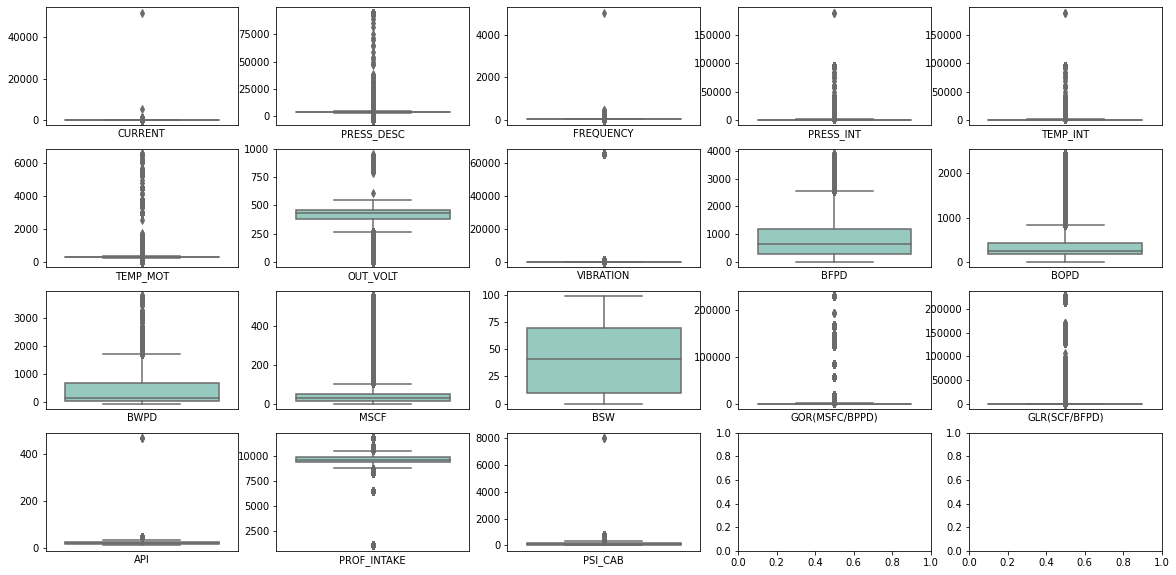

In [11]:
show_outliers(train_raw,train_raw.keys().drop(['WELL_ID','DATE','WellFailure','PUMP']))

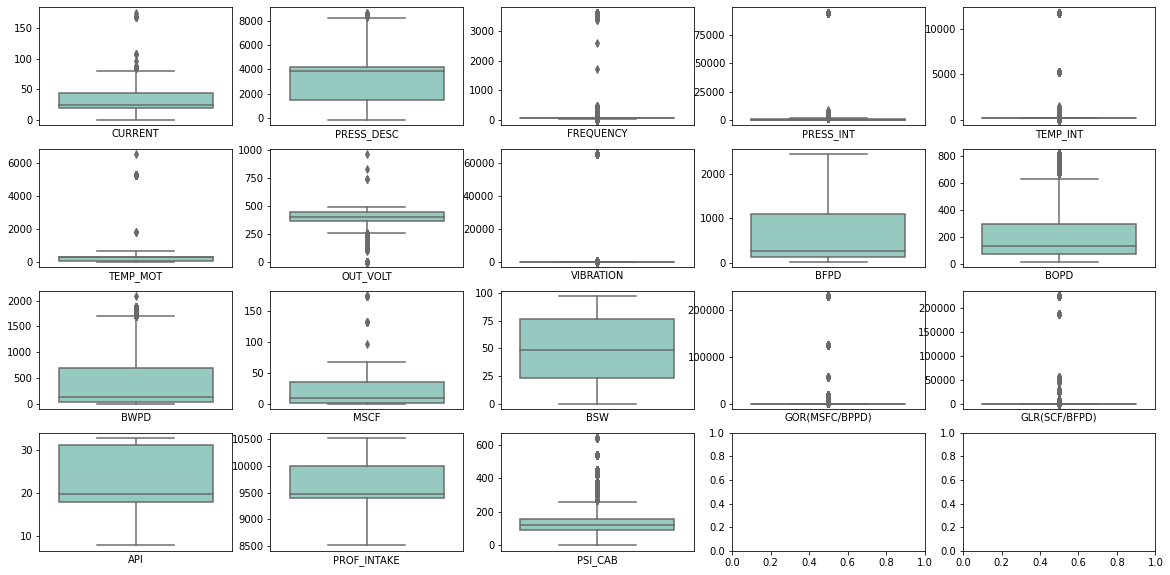

In [12]:
show_outliers(test_raw,test_raw.keys().drop(['WELL_ID','DATE','WellFailure','PUMP']))

In [13]:
#as we can see there many outliers that could be removed from the dataset
#delete outliers using different conditions
#values should not be under 0
index_names_pres=train_raw[(train_raw['PRESS_DESC']<0)].index
train_raw.drop(index_names_pres,inplace=True)
index_names_temint=train_raw[(train_raw['TEMP_INT']<0)].index
train_raw.drop(index_names_temint,inplace=True)
index_names_temmot=train_raw[(train_raw['TEMP_MOT']<0)].index
train_raw.drop(index_names_temmot,inplace=True)
#vibration values higher than 10 could be consider an outlier
index_names_vib=train_raw[(train_raw['VIBRATION']>10)].index
train_raw.drop(index_names_vib,inplace=True)
#current higher than 200 could be consider an outlier
index_names_cur=train_raw[(train_raw['CURRENT']>20000)].index
train_raw.drop(index_names_cur,inplace=True)
#pressure values higher than 10000 could be consider an outlier
index_names_presint=train_raw[(train_raw['PRESS_INT']>150000)].index
train_raw.drop(index_names_presint,inplace=True)
#temperature values higher than 500 could be consider an outlier
index_names_temint1=train_raw[(train_raw['TEMP_INT']>150000)].index
train_raw.drop(index_names_temint1,inplace=True)
#frequency higher than 10000 could be consider an outlier
index_names_cur=train_raw[(train_raw['FREQUENCY']>4000)].index
train_raw.drop(index_names_cur,inplace=True)
#API higher than 50 is an outlier
index_names_api=train_raw[(train_raw['API']>50)].index
train_raw.drop(index_names_api,inplace=True)

In [14]:
#as we can see there many outliers that could be removed from the dataset
#delete outliers using different conditions
#values should not be under 0
index_names_pres=test_raw[(test_raw['PRESS_DESC']<0)].index
test_raw.drop(index_names_pres,inplace=True)
index_names_temint=test_raw[(test_raw['TEMP_INT']<0)].index
test_raw.drop(index_names_temint,inplace=True)
index_names_temmot=test_raw[(test_raw['TEMP_MOT']<0)].index
test_raw.drop(index_names_temmot,inplace=True)
#vibration values higher than 10 could be consider an outlier
index_names_vib=test_raw[(test_raw['VIBRATION']>10)].index
test_raw.drop(index_names_vib,inplace=True)
#current higher than 200 could be consider an outlier
#index_names_cur=test_raw[(test_raw['CURRENT']>20000)].index
#test_raw.drop(index_names_cur,inplace=True)
#pressure values higher than 10000 could be consider an outlier
#index_names_presint=test_raw[(test_raw['PRESS_INT']>20000)].index
#test_raw.drop(index_names_presint,inplace=True)
#temperature values higher than 500 could be consider an outlier
#index_names_temint1=test_raw[(test_raw['TEMP_INT']>10000)].index
#test_raw.drop(index_names_temint1,inplace=True)
#frequency higher than 10000 could be consider an outlier
#index_names_cur=test_raw[(test_raw['FREQUENCY']>4000)].index
#test_raw.drop(index_names_cur,inplace=True)

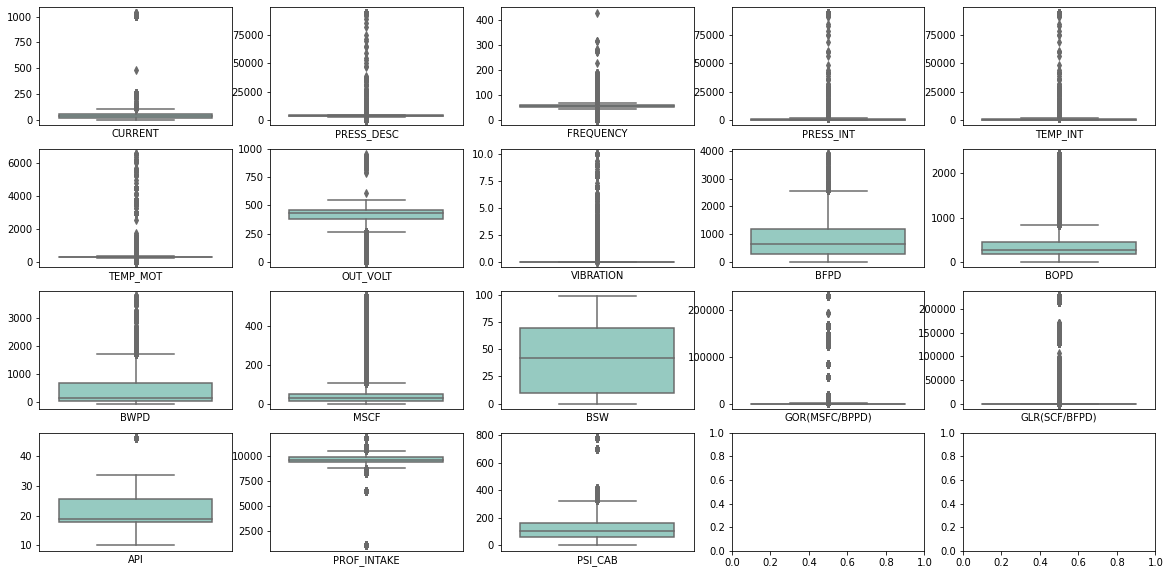

In [15]:
show_outliers(train_raw,train_raw.keys().drop(['WELL_ID','DATE','WellFailure','PUMP']))

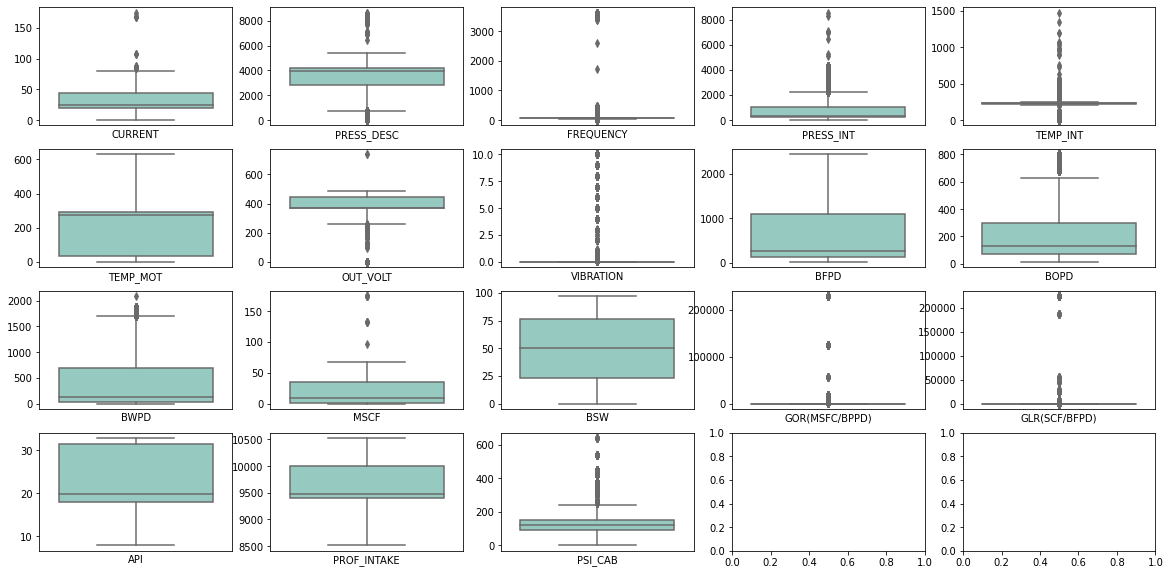

In [16]:
show_outliers(test_raw,test_raw.keys().drop(['WELL_ID','DATE','WellFailure','PUMP']))

In [17]:
#check for missing values
print(train_raw.isna().sum())


WELL_ID                 0
DATE                    0
CURRENT                 0
PRESS_DESC         535966
FREQUENCY               0
PRESS_INT              55
TEMP_INT           260527
TEMP_MOT           284128
OUT_VOLT          7718152
VIBRATION          536835
WellFailure       8044056
BFPD                    0
BOPD                    0
BWPD                    0
MSCF                    0
BSW                     0
GOR(MSFC/BPPD)          0
GLR(SCF/BFPD)           0
API                     0
PROF_INTAKE             0
PUMP                    0
PSI_CAB                 0
dtype: int64


In [18]:
print(test_raw.isna().sum())

WELL_ID                 0
DATE                    0
CURRENT                 0
PRESS_DESC         154131
FREQUENCY               0
PRESS_INT               0
TEMP_INT            82848
TEMP_MOT            65846
OUT_VOLT          1075843
VIBRATION          123740
WellFailure       1103616
BFPD                    0
BOPD                    0
BWPD                    0
MSCF                    0
BSW                     0
GOR(MSFC/BPPD)          0
GLR(SCF/BFPD)           0
API                     0
PROF_INTAKE             0
PUMP                    0
PSI_CAB                 0
dtype: int64


In [19]:
#complete missing values using mean values
train_raw['PRESS_DESC'].fillna(train_raw['PRESS_DESC'].mean(),inplace=True)
train_raw['PRESS_INT'].fillna(train_raw['PRESS_INT'].mean(),inplace=True)
train_raw['TEMP_INT'].fillna(train_raw['TEMP_INT'].mean(),inplace=True)
train_raw['TEMP_MOT'].fillna(train_raw['TEMP_MOT'].mean(),inplace=True)
train_raw['OUT_VOLT'].fillna(train_raw['OUT_VOLT'].mean(),inplace=True)
train_raw['VIBRATION'].fillna(train_raw['VIBRATION'].mean(),inplace=True)

In [20]:
test_raw['PRESS_DESC'].fillna(test_raw['PRESS_DESC'].mean(),inplace=True)
test_raw['PRESS_INT'].fillna(test_raw['PRESS_INT'].mean(),inplace=True)
test_raw['TEMP_INT'].fillna(test_raw['TEMP_INT'].mean(),inplace=True)
test_raw['TEMP_MOT'].fillna(test_raw['TEMP_MOT'].mean(),inplace=True)
test_raw['OUT_VOLT'].fillna(test_raw['OUT_VOLT'].mean(),inplace=True)
test_raw['VIBRATION'].fillna(test_raw['VIBRATION'].mean(),inplace=True)

In [21]:
train_raw.isna().sum()

WELL_ID                 0
DATE                    0
CURRENT                 0
PRESS_DESC              0
FREQUENCY               0
PRESS_INT               0
TEMP_INT                0
TEMP_MOT                0
OUT_VOLT                0
VIBRATION               0
WellFailure       8044056
BFPD                    0
BOPD                    0
BWPD                    0
MSCF                    0
BSW                     0
GOR(MSFC/BPPD)          0
GLR(SCF/BFPD)           0
API                     0
PROF_INTAKE             0
PUMP                    0
PSI_CAB                 0
dtype: int64

In [22]:
#encode label from pump column
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

pump_list=train_raw['PUMP'].unique()
pump_code=encoder.fit_transform(pump_list)
pump_df=pd.DataFrame({'PUMP':pump_list,'CODE':pump_code})
pump_df


,PUMP,CODE
0,ESP-580,42
1,ESP-100,11
2,ESP-588,44
3,ESP-810,49
4,ESP-919,68
5,ESP-545,38
6,ESP-894,64
7,ESP-180,16
8,ESP-990,74
9,ESP-845,54


In [23]:
#merge pump code to raw datasets
train_raw=pd.merge(train_raw,pump_df,how='inner',on=['PUMP'])
test_raw=pd.merge(test_raw,pump_df,how='inner',on=['PUMP'])

train_raw.drop(columns='PUMP',inplace=True)
test_raw.drop(columns='PUMP',inplace=True)


In [24]:
#set longitude and latitude for each well 
locations=pd.read_csv('well_locations.csv')
train_raw=pd.merge(train_raw,locations,how='inner',on=['WELL_ID'])
test_raw=pd.merge(test_raw,locations,how='inner',on=['WELL_ID'])


In [25]:
train_raw['WellFailure'].fillna('NoEvent',inplace=True)

In [26]:
train_raw.to_csv('train_clean.csv')
test_raw.to_csv('test_clean.csv')